# INFO 251: Final project

#### Members: Marius Brogaard Lerstein and Tuva Cornelia Oppenhagen

## Introduction

Bike sharing is a growing transportation method in many cities around the world, with over 500 rental programs with a total of over 500 thousand bikes, an important insight to the business is how many bikes are rented per day. With factors such as weather, weekend, temperature, wind information etc. affecting the number of rentals, this gives a good foundation for a machine learning classification problem. In our research project, we want to try out different classification algorithms to predict the amount of bikes that were rented in a given day. The models we want to try out include; logistic regression, Naive Bayes, K-Nearest Neighbors, Decision Trees, Random Forests.

The dataset we are going to use contains the count of rental bikes between 2011 and 2012 in Washington, DC including information about the weather conditions and season. We are going to use the dataset containing hourly information in order to get more data to use in order to train and test our model.

<b>Link to dataset:</b> https://www.kaggle.com/datasets/marklvl/bike-sharing-dataset

As the different classification models require different data preprocessing, we want to split our work into finishing one model before starting on the next one. Therefore, we suggest these milestones for our deliverables:

<b>Before 04/15/2023</b>: 
Implement model for logistic regression, naive bayes, K-Nearest Neighbors, with the required preprocessing.

<b>Before 03/05/2023</b>: 
Implement the decision tree and random forest algorithms, with their required preprocessing. To conclude the results from all of our algorithms, our comparison between the accuracy values should also be described in this milestone.


## EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

seed=99
random.seed(seed)
np.random.seed(seed)

In [2]:
data = pd.read_csv('data/hour.csv')

In [3]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [5]:
print('Contains missing values:', data.isnull().values.any())

Contains missing values: False


In [6]:
print('Data shape:', data.shape)
data.describe()

Data shape: (17379, 17)


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In the table above, we can see descriptive statistics of the 16 numerical features (of 17 total features).

### Distribution of features
Vizualise the data to improve insight. Try to identify patterns, trends, outliers etc.

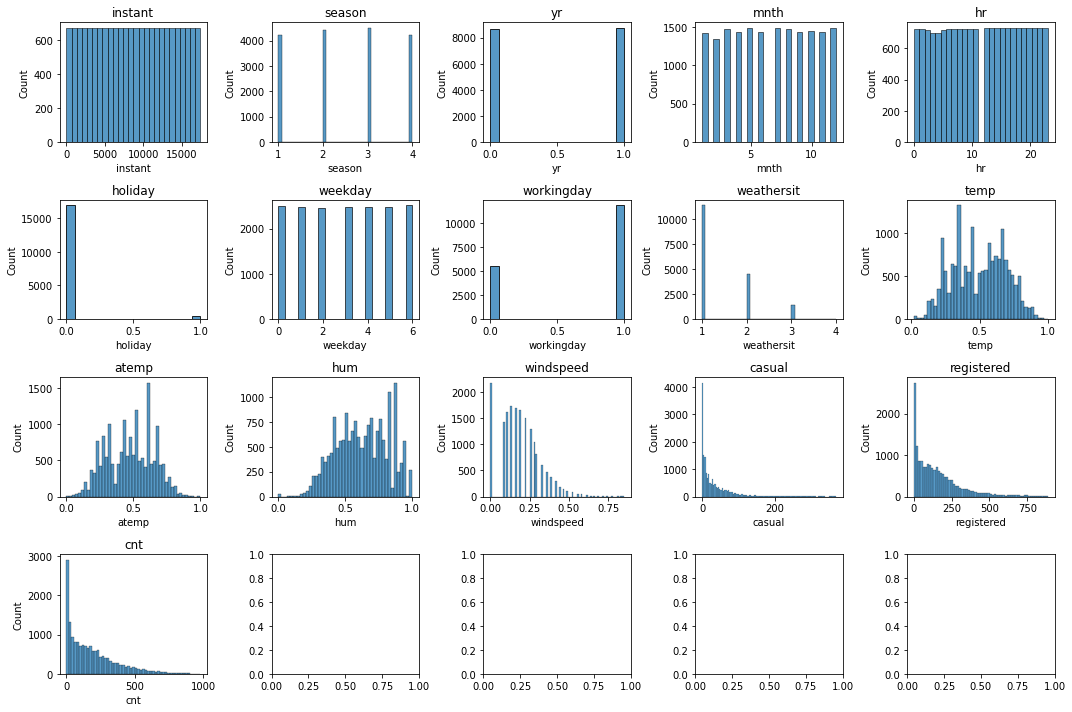

In [7]:
import seaborn as sns

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 10))
axes = axes.flatten()

# loop through each column and plot the distribution
for i, col in enumerate(data.drop(['dteday'], axis=1).columns):
    sns.histplot(data[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

From the descriptive statistics we see that the distributions of the features are varies. To avoid scaling issues that can impact the performance of some models it might be a good idea to perform normalization and standardization.

## Data cleaning

From the EDA phase, we noticed some features which we concluded that should not be kept in the dataset when performing the predictive analysis.
* instant works as an index for each record in the data and should be dropped.
* yr contains which of the two years the data was from and as this information is not important, this should be dropped also.
* dteday contains the date information. This is dropped for the same reason as 'yr'.
* casual and registered combined results in the count (cnt) feature and we can therefore be dropped.

In [8]:
data = data.drop(columns=['instant', 'yr', 'dteday', 'casual', 'registered'])

In [9]:
data['weathersit'].value_counts()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

## Feature Engineering

Before we perform our predictive analysis, we should recode our features into numerical values. Some of the models we will use requires this preprocessing for the input. There are several methods to numerical encode categorical values. We will use one-hot encoding on the categorical features which does not have ordinal relations, and label encoding on the features which do.

Day in the week is ordinal and this feature is usually not one-hot encoded. We used the reasoning from this discussion: https://www.mikulskibartosz.name/time-in-machine-learning/.

In [10]:
data.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [11]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
trans_season = ohe.fit_transform(data[['season']])
data[ohe.categories_[0]] = trans_season.toarray()
data = data.drop(columns=['season'])
data = data.rename(columns={1:'season_1', 2:'season_2', 3:'season_3', 4:'season_4'})

In [12]:
ohe = OneHotEncoder()
trans_holiday = ohe.fit_transform(data[['holiday']])
data[ohe.categories_[0]] = trans_holiday.toarray()
data = data.drop(columns=['holiday'])
data = data.rename(columns={0:'holiday_0', 1:'holiday_1'})

In [13]:
ohe = OneHotEncoder()
trans_workingday = ohe.fit_transform(data[['workingday']])
data[ohe.categories_[0]] = trans_workingday.toarray()
data = data.drop(columns=['workingday'])
data = data.rename(columns={0:'workingday_0', 1:'workingday_1'})

In [14]:
ohe = OneHotEncoder()
trans_weathersit = ohe.fit_transform(data[['weathersit']])
data[ohe.categories_[0]] = trans_weathersit.toarray()
data = data.drop(columns=['weathersit'])
data = data.rename(columns={1:'weathersit_1', 2:'weathersit_2', 3:'weathersit_3', 4:'weathersit_4'})

In [15]:
print(data.columns)
print(len(data.columns))

Index(['mnth', 'hr', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_1', 'season_2', 'season_3', 'season_4', 'holiday_0',
       'holiday_1', 'workingday_0', 'workingday_1', 'weathersit_1',
       'weathersit_2', 'weathersit_3', 'weathersit_4'],
      dtype='object')
20


### Store the dataframe as CSV to save computing.

In [16]:
data.to_csv('data/rental.csv', index=False)